In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [241]:
df = pd.read_csv(r'F:\Ineuron\ML\Algerian forest fire\Algerian_forest_fires_data_cleared.csv')

In [242]:
#EDA & Feature engg

In [243]:
#1. Renaming categorical variable and feature name correctly

In [244]:
df.rename(columns = {'Classes  ':'Classes'},inplace=True)

In [245]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [246]:
pd.unique(df['Classes'])

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [247]:
df.replace(['not fire   ','not fire ','not fire     ','not fire    '],'not fire',inplace = True)
df.replace(['fire   ','fire '],'fire',inplace = True)

In [248]:
df.replace('fire',1,inplace = True)
df.replace('not fire',0,inplace = True)
#Replacing fire as 1 and not fire as 0

In [249]:
#2. Missing values

In [250]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 26.8 KB


In [252]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [253]:
df.groupby('Classes').count()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Classes,,,,,,,,,,,,,
0,106,106,106,106,106,106,106,106,106,106,106,106,106
1,138,138,138,138,138,138,138,138,138,138,138,138,138


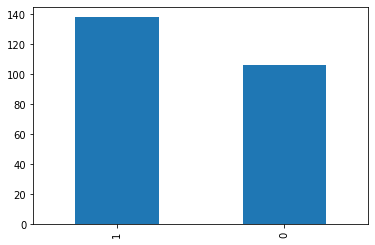

In [254]:
df['Classes'].value_counts().plot.bar()
plt.show()
#almost a balanced dataset

In [255]:
#3.Numerical variables (continuos and discrete)

In [256]:
discrete = []
continous = []

for i in df.columns:
    con = len(pd.unique(df[i]))
    if con > 4:
        continous.append(i)
    else:
        discrete.append(i)

In [257]:
continous =[ 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DC',
 'ISI', 'FWI']

In [258]:
for i in df.columns:
    print('the column name is',i)
    pd.unique(df[i])

    
#year has no purpose so we drop the column


the column name is day
the column name is month
the column name is year
the column name is Temperature
the column name is  RH
the column name is  Ws
the column name is Rain 
the column name is FFMC
the column name is DMC
the column name is DC
the column name is ISI
the column name is BUI
the column name is FWI
the column name is Classes


In [259]:
df.drop('year',axis=1,inplace=True)
#year column dropped

<AxesSubplot:>

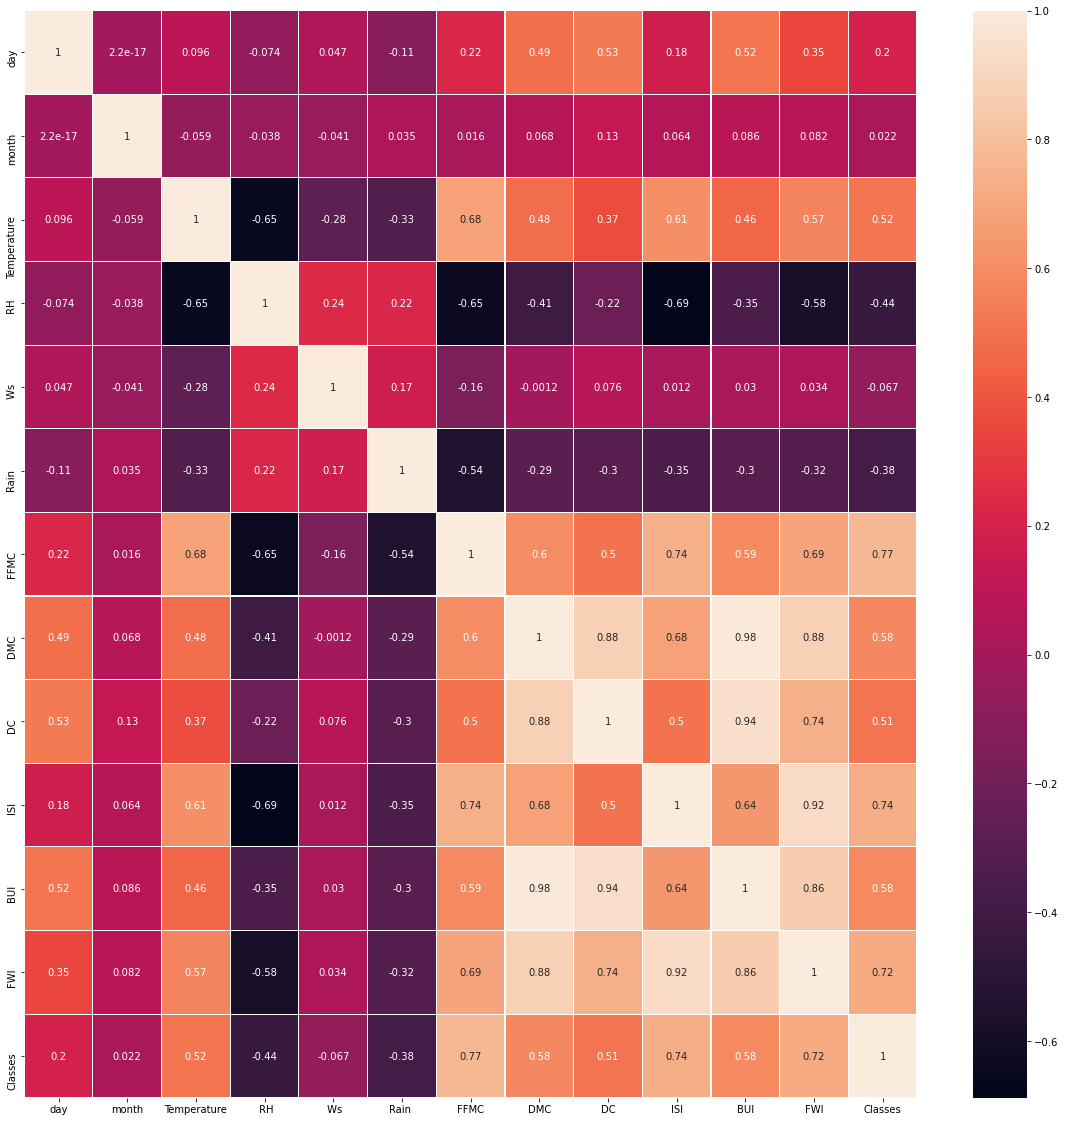

In [260]:
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(),annot= True,linewidths=0.15)

#finding the correllation between varibales

In [261]:
#DMC and BUI are so correalated
#BUI and DC are so correlated

In [262]:
#hence we can drop 2 out of 3 columns

In [263]:
df.drop(['DMC','BUI','day'],axis=1,inplace=True)

In [264]:
df

,month,Temperature,RH,Ws,Rain,FFMC,DC,ISI,FWI,Classes
0,6,29,57,18,0.0,65.7,7.6,1.3,0.5,0
1,6,29,61,13,1.3,64.4,7.6,1.0,0.4,0
2,6,26,82,22,13.1,47.1,7.1,0.3,0.1,0
3,6,25,89,13,2.5,28.6,6.9,0.0,0.0,0
4,6,27,77,16,0.0,64.8,14.2,1.2,0.5,0
...,...,...,...,...,...,...,...,...,...,...
239,9,30,65,14,0.0,85.4,44.5,4.5,6.5,1
240,9,28,87,15,4.4,41.1,8.0,0.1,0.0,0
241,9,27,87,29,0.5,45.9,7.9,0.4,0.2,0
242,9,24,54,18,0.1,79.7,15.2,1.7,0.7,0


<AxesSubplot:xlabel='month,Classes'>

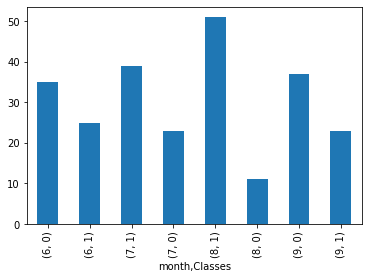

In [265]:
df.groupby('month')['Classes'].value_counts().plot.bar()

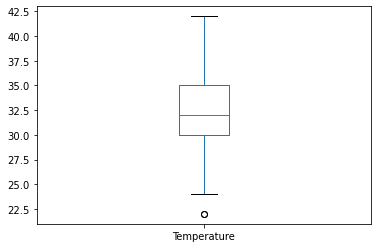

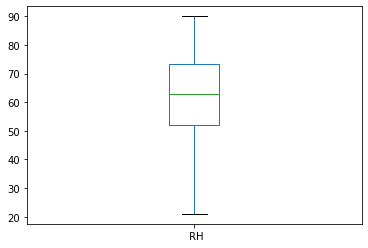

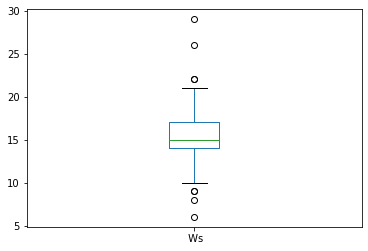

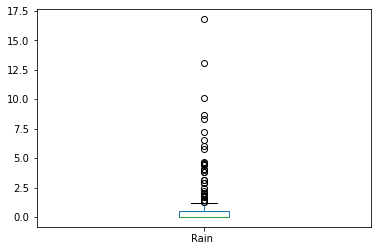

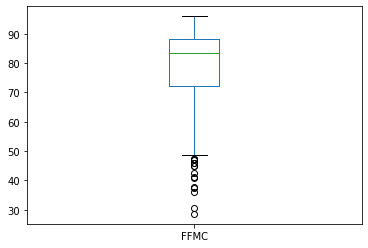

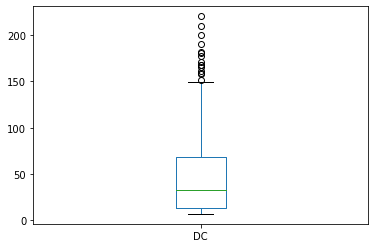

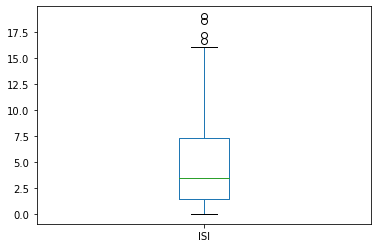

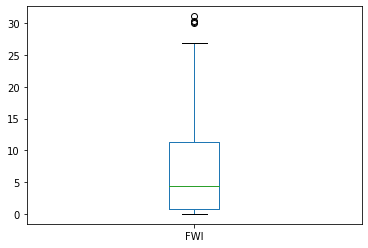

In [266]:
#Detecting the outliers

for i in continous:
    df[i].plot.box()
    plt.show()

TypeError: 'str' object is not callable

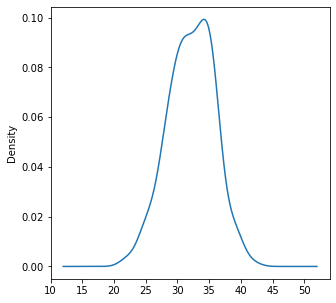

In [267]:
for i in continous:
    plt.figure(figsize=(5,5))
    df[i].plot.density()
    plt.xlabel(i)
    plt.show()

In [268]:
#rain,DC,ISI FWI are right skewed data
#FFMC is the only left skewed data
df.columns

Index(['month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DC', 'ISI',
       'FWI', 'Classes'],
      dtype='object')

In [269]:
dummyset = df
skewed = ['Rain ','DC','ISI','FWI','FFMC']

In [270]:
dummyset['DC'] = np.log10(dummyset['DC'])

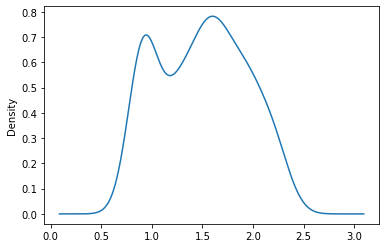

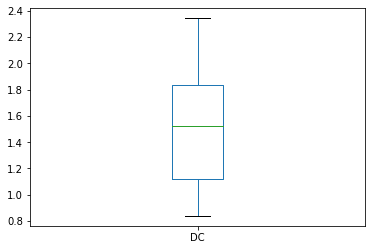

In [271]:
dummyset['DC'].plot.density()
plt.show()
dummyset['DC'].plot.box()
plt.show()

#outliers removed by doing log transformatipon

In [272]:
dummyset['ISI'] = (dummyset['ISI']**(1/3))

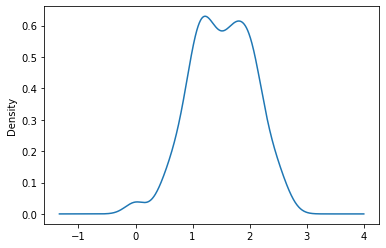

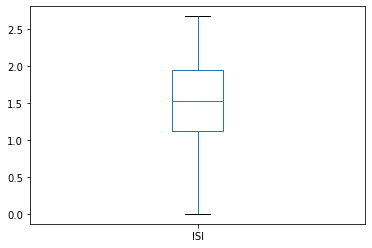

In [273]:
dummyset['ISI'].plot.density()
plt.show()
dummyset['ISI'].plot.box()
plt.show()
#outliers removed by doing cbrt transformatipon

In [274]:
dummyset['FWI'] = (dummyset['FWI']**(1/3))

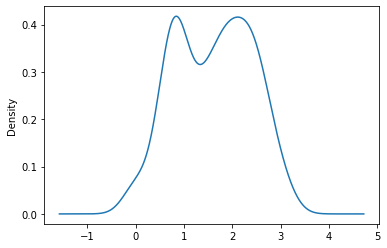

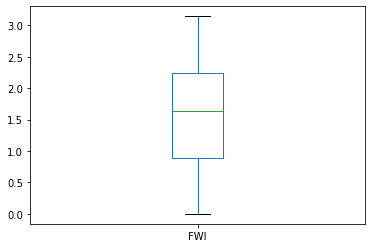

In [275]:
dummyset['FWI'].plot.density()
plt.show()
dummyset['FWI'].plot.box()
plt.show()
#outliers removed by doing cbrt transformatipon

In [276]:
tem = dummyset['Rain ']

<AxesSubplot:ylabel='Density'>

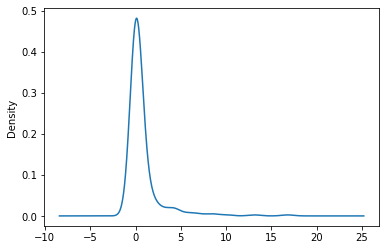

In [277]:
tem.plot.density()

<AxesSubplot:>

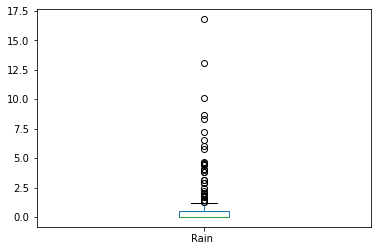

In [279]:
(tem).plot.box()

In [281]:
df.groupby('Classes')['Rain '].value_counts()

Classes  Rain 
0        0.0       19
         0.1        9
         0.2        8
         0.4        7
         0.3        6
         0.7        6
         0.6        4
         0.5        3
         1.1        3
         1.2        3
         1.8        3
         2.0        3
         0.8        2
         1.0        2
         1.3        2
         1.4        2
         2.9        2
         3.1        2
         3.8        2
         0.9        1
         1.7        1
         2.2        1
         2.5        1
         4.0        1
         4.1        1
         4.4        1
         4.5        1
         4.6        1
         4.7        1
         5.8        1
         6.5        1
         7.2        1
         8.3        1
         8.7        1
         10.1       1
         13.1       1
         16.8       1
1        0.0      114
         0.1        9
         0.2        4
         0.3        4
         0.5        2
         0.6        2
         0.4        1
         1.9     

In [282]:
dummyset

,month,Temperature,RH,Ws,Rain,FFMC,DC,ISI,FWI,Classes
0,6,29,57,18,0.0,65.7,0.880814,1.091393,0.793701,0
1,6,29,61,13,1.3,64.4,0.880814,1.000000,0.736806,0
2,6,26,82,22,13.1,47.1,0.851258,0.669433,0.464159,0
3,6,25,89,13,2.5,28.6,0.838849,0.000000,0.000000,0
4,6,27,77,16,0.0,64.8,1.152288,1.062659,0.793701,0
...,...,...,...,...,...,...,...,...,...,...
239,9,30,65,14,0.0,85.4,1.648360,1.650964,1.866256,1
240,9,28,87,15,4.4,41.1,0.903090,0.464159,0.000000,0
241,9,27,87,29,0.5,45.9,0.897627,0.736806,0.584804,0
242,9,24,54,18,0.1,79.7,1.181844,1.193483,0.887904,0


In [288]:
dummyset.to_csv('EDA.csv', sep='\t',index=False)